In [3]:
## Funciones de scattering
%run SSA_enero_2021.ipynb


## Integración gaussiana
%run int_gauss.ipynb

Path_figs = '/home/mariano/Desktop/SSA/'

In [4]:
import numpy as np
from numpy import cos, sin, pi, log10, exp, sqrt, prod


import matplotlib
from matplotlib import pyplot as plt

## Salidas una sola interfaz ##

- Orden UNO: X1(ksx,ksy,kix,kiy,ki,ep0,ep1,s1,l1) 


- Orden DOS: X2(ksx,ksy,rx,ry,kix,kiy,ki,ep0,ep1,s1,l1)
        integrear en cartesianas sobre [rx, ry]


- Orden TRES: X3(ksx,ksy,rx,ry,tx,ty,kix,kiy,ep0,ep1,s1,l1)
        integrear en cartesianas sobre [rx, ry]


********************************************************************

## Salidas con dos interfaces ##

### Rough surface on the bottom side ###

- Orden UNO: S1_QP_b (ki,ths,phs,thi,phi,e0,e1,e2,d,l,s)


- Orden DOS: I2_QP_b (rx,ry,ki,ths,phs,thi,phi,e0,e1,e2,d,s,l)
        integrar en cartesianas sobre [rx, ry]
        

- Orden TRES: I3_QP_b (rx,ry,ki,ths,phs,thi,phi,e0,e1,e2,d,s,l)
        integrar en cartesianas sobre [rx, ry]
        
        
        
### Rough surface on the upper side ###

- Orden UNO: S1_QP_u (ki,ths,phs,thi,phi,e0,e1,e2,d,l,s)


- Orden DOS: I2_QP_u (rx,ry,ki,ths,phs,thi,phi,e0,e1,e2,d,s,l)
        integrar en cartesianas sobre [rx, ry]
        

- Orden TRES: I3_QP_u (rx,ry,ki,ths,phs,thi,phi,e0,e1,e2,d,s,l)
        integrar en cartesianas sobre [rx, ry]
        


# <span style='color:blue'> RESULTADOS PRB  </span> # 

# <span style='color:red'>  A rough surface separating two different media </span> #

## Parámetros para reproducir Fig.8 de PRB ##

In [ ]:
l0 = 457.9e-9
s1_l0 = 5e-9/l0
l1_l0 = 100e-9/l0

#--------------------------#

landa = l0
ki = 2*pi/landa

thi = 1e-10*pi/180
phi = 0

kix = kx(ki,thi,phi)
kiy = ky(ki,thi,phi)

n_ths = 60
thetas = np.linspace(-89*pi/180,89*pi/180,n_ths)
phs = phi 

ep0 = 1
ep1 = -7.5 + 1j*0.24

s1 = landa*s1_l0
l1 = landa*l1_l0
###---------------------------------------------------------###

####### parámetros integración gaussiana ######
n_gauss = 350    
k_lim = 5/l1

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###



vv_O1 = np.zeros(n_ths, dtype = float)
hv_O1 = np.zeros(n_ths, dtype = float)
vh_O1 = np.zeros(n_ths, dtype = float)
hh_O1 = np.zeros(n_ths, dtype = float)

vv_O2 = np.zeros(n_ths, dtype = float)
hv_O2 = np.zeros(n_ths, dtype = float)
vh_O2 = np.zeros(n_ths, dtype = float)
hh_O2 = np.zeros(n_ths, dtype = float)

vv_O3 = np.zeros(n_ths, dtype = float)
hv_O3 = np.zeros(n_ths, dtype = float)
vh_O3 = np.zeros(n_ths, dtype = float)
hh_O3 = np.zeros(n_ths, dtype = float)



for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(thi)/(2*np.pi)**2
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
    vv_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    hv_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    vh_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    hh_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    
    
    # orden dos #
    aux_vv_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[0,0])
    vv_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_hv_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,1]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,1]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[0,1])
    hv_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_O2,(1,m_gauss**2)))))
    
    aux_vh_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,0]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,0]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[1,0])
    vh_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_O2,(1,m_gauss**2)))))
    
    aux_hh_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[1,1])
    hh_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))
    
    
    # orden tres #
    aux_vv_O3 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X3(ksx,ksy,kix,kiy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]*\
            np.conj(X3(ksx,ksy,RX,RY,kix-ksx+RX,kiy-ksy+RY,kix,kiy,ki,ep0,ep1)[0,0]+\
                    X3(ksx,ksy,RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0])
    t_vv = W(ksx-kix,ksy-kiy,s1,l1)*X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0]
    vv_O3[j] = 2*np.real(f*J*t_vv*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O3,(1,m_gauss**2)))))
    
#     aux_hv_O3 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X3(ksx,ksy,kix,kiy,RX,RY,kix,kiy,ki,ep0,ep1)[0,1]*\
#             np.conj(X3(ksx,ksy,RX,RY,kix-ksx+RX,kiy-ksy+RY,kix,kiy,ki,ep0,ep1)[0,1]+\
#                     X3(ksx,ksy,RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1])
#     t_hv = W(ksx-kix,ksy-kiy,s1,l1)*X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1]
#     hv_O3[j] = 2*np.real(f*J*t_hv*np.nansum(np.nansum(Wt*np.reshape(aux_hv_O3,(1,m_gauss**2)))))
    
#     aux_vh_O3 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X3(ksx,ksy,kix,kiy,RX,RY,kix,kiy,ki,ep0,ep1)[1,0]*\
#             np.conj(X3(ksx,ksy,RX,RY,kix-ksx+RX,kiy-ksy+RY,kix,kiy,ki,ep0,ep1)[1,0]+\
#                     X3(ksx,ksy,RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0])
#     t_vh = W(ksx-kix,ksy-kiy,s1,l1)*X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0]
#     vh_O3[j] = 2*np.real(f*J*t_vh*np.nansum(np.nansum(Wt*np.reshape(aux_vh_O3,(1,m_gauss**2)))))
    
    aux_hh_O3 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X3(ksx,ksy,kix,kiy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]*\
            np.conj(X3(ksx,ksy,RX,RY,kix-ksx+RX,kiy-ksy+RY,kix,kiy,ki,ep0,ep1)[1,1]+\
                    X3(ksx,ksy,RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1])
    t_hh = W(ksx-kix,ksy-kiy,s1,l1)*X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1]
    hh_O3[j] = 2*np.real(f*J*t_hh*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O3,(1,m_gauss**2)))))
    
    

vv = vv_O1 + vv_O2 + vv_O3
hv = hv_O1 + hv_O2 + hv_O3
vh = vh_O1 + vh_O2 + vh_O3
hh = hh_O1 + hh_O2 + hh_O3


fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))


ax[0,0].plot(180/np.pi*thetas,vv_O1,'r',label = 'VV-O1')
ax[0,0].plot(180/np.pi*thetas,vv_O2,'b',label = 'VV-O2')
ax[0,0].plot(180/np.pi*thetas,vv_O3,'k',label = 'VV-O3')
ax[0,0].plot(180/np.pi*thetas,vv,'g-.',label = 'VV')
ax[0,0].grid('on')
ax[0,0].legend(loc="upper right",fontsize=12)
ax[0,0].set(ylabel="$\gamma_{VV}$", ylim = (0,3.5e-3))

ax[0,1].plot(180/np.pi*thetas,vh_O1,'r',label = 'HV-O1')
ax[0,1].plot(180/np.pi*thetas,vh_O2,'b',label = 'HV-O2')
ax[0,1].plot(180/np.pi*thetas,vh_O3,'k',label = 'HV-O3')
ax[0,1].plot(180/np.pi*thetas,vh,'g-.',label = 'HV')
ax[0,1].grid('on')
ax[0,1].legend(loc="upper right",fontsize=12)
ax[0,1].set(ylabel="$\gamma_{HV}$", ylim = (0,3.5e-4))

ax[1,0].plot(180/np.pi*thetas,hh_O1,'r',label = 'HH-O1')
ax[1,0].plot(180/np.pi*thetas,hh_O2,'b',label = 'HH-O2')
ax[1,0].plot(180/np.pi*thetas,hh_O3,'k',label = 'HH-O3')
ax[1,0].plot(180/np.pi*thetas,hh,'g-.',label = 'HH')
ax[1,0].grid('on')
ax[1,0].legend(loc="upper right",fontsize=12)
ax[1,0].set(ylabel="$\gamma_{HH}$", ylim = (0,3.5e-3))


ax[1,1].plot(180/np.pi*thetas,hv_O1,'r',label = 'VH-O1')
ax[1,1].plot(180/np.pi*thetas,hv_O2,'b',label = 'VH-O2')
ax[1,1].plot(180/np.pi*thetas,hv_O3,'k',label = 'VH-O3')
ax[1,1].plot(180/np.pi*thetas,hv,'g-.',label = 'VH')
ax[1,1].grid('on')
ax[1,1].legend(loc="upper right",fontsize=12)
ax[1,1].set(ylabel="$\gamma_{VH}$", y = lim(0,3.5e-4))


fig.suptitle('Figura 8 PRB', fontsize=18)
plt.show()



## **FIGURA 8 REPRODUCIDA EXCELENTE!!**

## <span style= color:red> Recupero resultados SPM - Johnson 1999 - una sola interface  </span>

In [5]:
## parámetros globales
landa = 0.25
ki = 2*np.pi/landa
th_i = 10*np.pi/180
ph_i = np.pi
ph_s = ph_i + 0*np.pi

kix = kx(ki,th_i,ph_i)
kiy = ky(ki,th_i,ph_i)

thitas = np.linspace(-60*np.pi/180,60*np.pi/180,160)
n_thitas = len(thitas)

ep0 = 1
ep1 = 3

s = 0.06*landa
l = landa

In [7]:
#---------------vectores salida------------------#
## VV; HH; VH ##


out_ssa = np.zeros((3,3,n_thitas),dtype=float)
#-----------------------------------------------#


## ---------------------- Salida Orden Uno ---------------------- ##
for j in range (n_thitas):
    
    Q = thitas[j]

    # SSA #
    f = ki**4*np.cos(Q)**2*np.cos(th_i)/(2*np.pi)**2
    
    ksx = kx(ki,Q,ph_s)
    ksy = ky(ki,Q,ph_s)

    out_ssa[0,0,j] = f*np.abs(X1(qsx,qsy,kix,kiy,ki,ep0,ep1)[0,0])**2*W(ksx-kix,ksy-kiy,s,l)
    out_ssa[1,0,j] = f*np.abs(X1(qsx,qsy,kix,kiy,ki,ep0,ep1)[1,1])**2*W(ksx-kix,ksy-kiy,s,l)
    


In [11]:
## ---------------------- Salida Orden Dos ---------------------- ##
##------------Integración por cuadratura gaussiana------------##
n_gauss = 220    
k_lim = 1.5*ki

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']
J = k_lim**2/(2*np.pi)**2
##----------------------------------------------------------------##



for j in range (n_thitas):
    
    Q = thitas[j]
    
    ksx = kx(ki,Q,ph_s)
    ksy = ky(ki,Q,ph_s)

    f = ki**4*np.cos(Q)**2*np.cos(th_i)/(2*np.pi)**2
    
    aux_vv_O2 = W(ksx-RX,ksy-RY,s,l)*W(RX-kix,RY-kiy,s,l)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[0,0])
    out_ssa[0,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_hh_O2 = W(ksx-RX,ksy-RY,s,l)*W(RX-kix,RY-kiy,s,l)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[1,1])
    out_ssa[1,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))
    
##-----------------------------------------------------------##



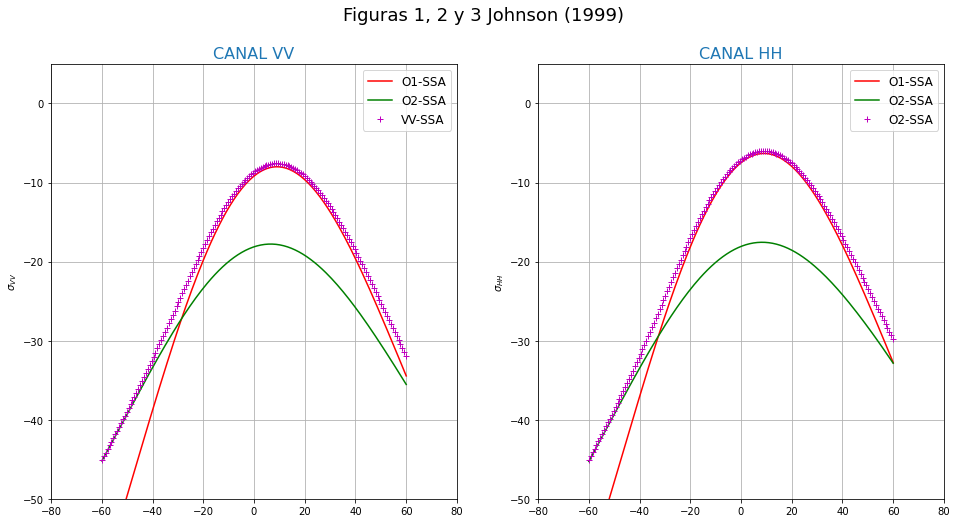

In [59]:
def dB(x):
    return 10*np.log10(x)

## gráficos biestático ##

fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

ax[0].plot(180/np.pi*thitas,dB(out_ssa[0,0,:]), 'r-', label = "O1-SSA")
ax[0].plot(180/np.pi*thitas,dB(out_ssa[0,1,:]), 'g-', label = "O2-SSA")
ax[0].plot(180/np.pi*thitas,dB(out_ssa[0,0,:]+out_ssa[0,1,:]), 'm+', label = "VV-SSA")
ax[0].grid('on')
ax[0].legend(loc="upper right",fontsize=12)
ax[0].set(ylabel="$\sigma_{VV}$",xlim = (-80, 80), ylim = (-50, 5))
ax[0].set_title(label = 'CANAL VV', color ='C0', fontsize=16,
                                fontstyle='normal')


ax[1].plot(180/np.pi*thitas,dB(out_ssa[1,0,:]), 'r-', label = "O1-SSA")
ax[1].plot(180/np.pi*thitas,dB(out_ssa[1,1,:]), 'g-', label = "O2-SSA")
ax[1].plot(180/np.pi*thitas,dB(out_ssa[1,0,:]+out_ssa[1,1,:]), 'm+', label = "O2-SSA")
ax[1].grid('on')
ax[1].legend(loc="upper right",fontsize=12)
ax[1].set(ylabel="$\sigma_{HH}$",xlim = (-80, 80), ylim = (-50, 5))
ax[1].set_title(label = 'CANAL HH', color ='C0', fontsize=16,
                                fontstyle='normal')


fig.suptitle('Figuras 1, 2 y 3 Johnson (1999)', fontsize=18)
plt.show()

#----------------------------------------------------------------------------------#

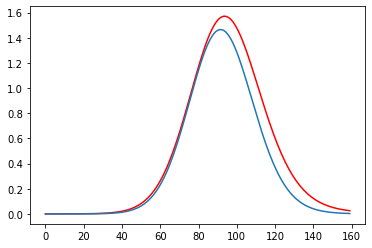

In [51]:
plt.plot(hh_O1_spm,'r')
plt.plot(2*np.pi*out_ssa[1,0,:])

### ** HAY UN FACTOR DE ESCALA PERO EL COMPORTAMIENTO ANGULAR ES EL CORRECTO! **

## <span style= color:red > Parámetros para reproducir Fig.1 y 2 de Gilbert (2003) </span>  ##
https://ieeexplore.ieee.org/abstract/document/1217520

In [ ]:
landa = 1
ki = 2*pi/landa

n_ths = 35
thetas = np.linspace(0.002*pi/180,70*pi/180,n_ths)
phi = 0
phs = phi + np.pi 

ep0 = 1
ep1 = 4 + 1j

s1 = 1/ki
l1 = 6/ki
###---------------------------------------------------------###

####### parámetros integración gaussiana ######
n_gauss = 650    
k_lim = 11/l1

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###



vv_O1 = np.zeros(n_ths, dtype = float)
hv_O1 = np.zeros(n_ths, dtype = float)
vh_O1 = np.zeros(n_ths, dtype = float)
hh_O1 = np.zeros(n_ths, dtype = float)

vv_O2 = np.zeros(n_ths, dtype = float)
hv_O2 = np.zeros(n_ths, dtype = float)
vh_O2 = np.zeros(n_ths, dtype = float)
hh_O2 = np.zeros(n_ths, dtype = float)


for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(Q)/(2*np.pi)**2
    
    kix = kx(ki,Q,phi)
    kiy = ky(ki,Q,phi)
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
    vv_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    hv_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    vh_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    hh_O1[j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    
    
    # orden dos #
    aux_vv_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,0]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[0,0])
    vv_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_hv_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,1]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[0,1]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[0,1])
    hv_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_O2,(1,m_gauss**2)))))
    
    aux_vh_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,0]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,0]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[1,0])
    vh_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_O2,(1,m_gauss**2)))))
    
    aux_hh_O2 = W(ksx-RX,ksy-RY,s1,l1)*W(RX-kix,RY-kiy,s1,l1)*X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]*\
            np.conj(X2(ksx,ksy,RX,RY,kix,kiy,ki,ep0,ep1)[1,1]+X2(ksx,ksy,ksx+kix-RX,ksy+kiy-RY,kix,kiy,ki,ep0,ep1)[1,1])
    hh_O2[j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))


vv = vv_O1 + vv_O2
hv = hv_O1 + hv_O2
vh = vh_O1 + vh_O2
hh = hh_O1 + hh_O2 

fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))


#ax[0].plot(180/np.pi*thetas,10*np.log10(vv_O1),'r',label = 'VV-O1')
ax[2].plot(180/np.pi*thetas,10*np.log10(vv_O2),'b',label = 'VV-O2')
ax[2].plot(180/np.pi*thetas,10*np.log10(vv),'g-.',label = 'VV')
ax[2].grid('on')
ax[2].legend(loc="upper right",fontsize=12)
ax[2].set(ylabel="$\gamma_{VV}$", ylim = (-60,5))


ax[1].plot(180/np.pi*thetas,10*np.log10(hv_O2),'b',label = 'HV-O2')
ax[1].plot(180/np.pi*thetas,10*np.log10(vh_O2),'g',label = 'VH-O2')
ax[1].grid('on')
ax[1].legend(loc="upper right",fontsize=12)
ax[1].set(ylabel="$\gamma_{VH}\,\gamma_{HV}$", ylim = (-80,0))

#ax[0].plot(180/np.pi*thetas,10*np.log10(hh_O1),'r',label = 'HH-O1')
ax[0].plot(180/np.pi*thetas,10*np.log10(hh_O2),'b',label = 'HH-O2')
ax[0].plot(180/np.pi*thetas,10*np.log10(hh),'g-.',label = 'HH')
ax[0].grid('on')
ax[0].legend(loc="upper right",fontsize=12)
ax[0].set(ylabel="$\gamma_{HH}$", ylim=(-60,4))

fig.suptitle('Figuras 1 y 2 Gilbert (2003) ', fontsize=18)
plt.show()

### **COMPORTAMIENTO ANGULAR CORRECTO, ESCALA CORRECTA, PERO DEBERÍA DECAER MAS LENTO**

## <span style=color:red>Parámetros para reproducir Fig.2 y 3 de Banon (2018) </span> ##
arxiv:1804.07507v1

In [ ]:
landa = 632.8e-9
ki = 2*pi/landa

n_ths = 180
thetas = np.linspace(-90*pi/180,90*pi/180,n_ths)
#thi = 70*np.pi/180
thi = np.array([1e-10, np.pi*35/180, np.pi*70/180])
n_thi = len(thi)

phi = 0
phs = phi

ep1 = 1
ep0 = 2.25

s1 = 32e-9
l1 = 211e-9
###---------------------------------------------------------###



vv_O1 = np.zeros((n_thi,n_ths), dtype = float)
hv_O1 = np.zeros((n_thi,n_ths), dtype = float)
vh_O1 = np.zeros((n_thi,n_ths), dtype = float)
hh_O1 = np.zeros((n_thi,n_ths), dtype = float)


for i in range(n_thi):
    
    q = thi[i]
    kix = kx(ki,q,phi)
    kiy = ky(ki,q,phi)

    for j in range(n_ths):

        Q = thetas[j]
        f = ki**4*np.cos(Q)**2*np.cos(q)/(2*np.pi)**2

        ksx = kx(ki,Q,phs)
        ksy = ky(ki,Q,phs)

        # orden uno #
        vv_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
        hv_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
        vh_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
        hh_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
        

fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for i in range(n_thi):
    Q = thi[i]*180/np.pi
    
    ax[i].plot(180/np.pi*thetas,hh_O1[i,:],'b',label = 'HH')
    ax[i].plot(180/np.pi*thetas,vv_O1[i,:],'g-.',label = 'VV')
    ax[i].grid('on')
    ax[i].legend(loc="upper right",fontsize=12)
    ax[i].set(title = "$\Theta_i = $" + str(round(Q,0)) , ylim=(0,6e-3))


fig.suptitle('Figura 2 Bannon (2018) ', fontsize=18)
plt.show()

In [ ]:
landa = 632.8e-9


n_ths = 180
thetas = np.linspace(-90*pi/180,90*pi/180,n_ths)
#thi = 70*np.pi/180
thi = np.array([1e-10, np.pi*35/180, np.pi*70/180])
n_thi = len(thi)

phi = 0
phs = phi

ep0 = 1
ep1 = 2.25
ki = np.sqrt(ep0)*2*np.pi/landa

s1 = 32e-9
l1 = 211e-9
###---------------------------------------------------------###



vv_O1 = np.zeros((n_thi,n_ths), dtype = float)
hv_O1 = np.zeros((n_thi,n_ths), dtype = float)
vh_O1 = np.zeros((n_thi,n_ths), dtype = float)
hh_O1 = np.zeros((n_thi,n_ths), dtype = float)


for i in range(n_thi):
    
    q = thi[i]
    kix = kx(ki,q,phi)
    kiy = ky(ki,q,phi)

    for j in range(n_ths):

        Q = thetas[j]
        f = ki**4*np.cos(Q)**2*np.cos(q)/(2*np.pi)**2

        ksx = kx(ki,Q,phs)
        ksy = ky(ki,Q,phs)

        # orden uno #
        vv_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
        hv_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
        vh_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
        hh_O1[i,j] = f*np.abs(X1(ksx,ksy,kix,kiy,ki,ep0,ep1)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
        

fig , ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for i in range(n_thi):
    Q = thi[i]*180/np.pi
    
    ax[i].plot(180/np.pi*thetas,hh_O1[i,:],'b',label = 'HH')
    ax[i].plot(180/np.pi*thetas,vv_O1[i,:],'g-.',label = 'VV')
    ax[i].grid('on')
    ax[i].legend(loc="upper right",fontsize=12)
    ax[i].set(title = "$\Theta_i = $" + str(round(Q,0)) , ylim=(0,6e-3))


fig.suptitle('Figura 3 Bannon (2018) ', fontsize=18)
plt.show()

#  <span style='color:green'>  Dos intefaces  </span> #

##  <span style='color:red'>  Rough surface on the bottom side ##

## Parámetros para reproducir Fig. 14 de PRB ##

In [ ]:
%run SSA_enero_2021.ipynb

%run parametros_RPB_Fig14.ipynb

####### parámetros integración gaussiana ######
n_gauss = 300
k_lim = 8.5*ki

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###

# VV; HV; HH; VH | O1, O2, O3, O1 + O2 + O3 \ thitas 

out_b = np.zeros((4,4,n_ths), dtype=float)



for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(thi)/(2*np.pi)**2
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
    out_b[0,0,j] = f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    out_b[1,0,j] = f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    out_b[2,0,j] = f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    out_b[3,0,j] = f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    
    
    # orden dos #X2_b(ux,uy,rx,ry,qx,qy,ki,ep0,ep1,ep2,d)

    aux_vv_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
    out_b[0,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_hv_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,0]
    out_b[1,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_O2,(1,m_gauss**2)))))

    aux_hh_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
    out_b[2,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))
    
    aux_vh_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,1]
    out_b[3,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_O2,(1,m_gauss**2)))))
    
    
    
    # orden tres # X3_b(ux,uy,rx,ry,tx,ty,qx,qy,ki,ep0,ep1,ep2,d)
    
#     aux_vv_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
#     t_vv = W(ksx-kix,ksy-kiy,s2,l2)*X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0]
#     out_b[0,2,j] = 2*np.real(f*J*t_vv*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O3,(1,m_gauss**2)))))

    
#     aux_hh_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
#     t_hh = W(ksx-kix,ksy-kiy,s2,l2)*X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1]
#     out_b[2,2,j] = 2*np.real(f*J*t_hh*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O3,(1,m_gauss**2)))))
    


out_b[0,3,:] = out_b[0,0,:] + out_b[0,1,:] + out_b[0,2,:]
out_b[1,3,:] = out_b[1,0,:] + out_b[1,1,:] + out_b[1,2,:]
out_b[2,3,:] = out_b[2,0,:] + out_b[2,1,:] + out_b[2,2,:]
out_b[3,3,:] = out_b[3,0,:] + out_b[3,1,:] + out_b[3,2,:]

np.save('fig16.npy',out_b)


## GRAFICOS ##

plot_labels = ([['VV-O1', 'VV-O2', 'VV-O3', 'VV'],['HV-O1', 'HV-O2', 'HV-O3', 'HV'], 
                ['HH-O1', 'HH-O2', 'HH-O3', 'HH'],['VH-O1', 'VH-O2', 'VH-O3', 'VH']])

plot_titles = ([['TM to TM', 'TM to TE'], ['TE to TE', 'TE to TM']])

plot_colors = (['r-', 'g-', 'b-', 'k-.'])

yaxis_labels = ([['CANAL VV', 'CANAL HV'], ['CANAL HH', 'CANAL VH']])
# plot_fontweight = (['light','normal', 'bold','heavy'])

fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

i = 0
    
for i1 in range(2):
    for i2 in range(2):

        for i3 in range(4):
            
            ax[i1,i2].plot(180*thetas/np.pi,out_b[i,i3,:],plot_colors[i3],label = plot_labels[i][i3])
            ax[i1,i2].grid('on')
            ax[i1,i2].legend(loc="upper left",fontsize=10)
            
            ax[i1,i2].set_title(label = plot_titles[i1][i2], color ='C0', fontsize=16,
                                fontstyle='normal')
            
            ax[i1,i2].set_xlabel("$\Theta$", color = 'k', fontsize = 14)
            
            ax[i1,i2].set_ylabel(yaxis_labels[i1][i2], color ='k', fontsize=14, fontstyle='normal')
                        
        i = i +1


fig.suptitle('Figura 16 PRB', fontsize=24)

plt.savefig( Path_figs + 'Figura_16_PRB.png', dpi = 400)
plt.show()

In [ ]:
res = np.load('fig13.npy')

VV_O2 = res[0,1,:]
N = len(VV_O2)
TH = np.linspace(-90,90,N)
plt.plot(TH,VV_O2,'r')
plt.grid('on')
plt.xlim(-90,90)
plt.xlabel("$\Theta$", fontsize=14)
plt.ylim(0,7.3e-4)
plt.ylabel('VV 2do orden', fontsize=14)
plt.title('Figura 15 PRB', fontsize = 16)
plt.show()

#  <span style='color:red'>  Rough surface on the upper side </span> #

## Parámetros para reproducir Fig.13 ##

In [ ]:
l0 = 632.8e-9
s1 = 15e-9
l1 = 100e-9
d = 500e-9
#--------------------------#

landa = l0
ki = 2*pi/landa

thi = 1e-10*np.pi/180
phi = 0

kix = kx(ki,thi,phi)
kiy = ky(ki,thi,phi)

n_ths = 180
thetas = np.linspace(-90*pi/180,90*pi/180,n_ths)
phs = phi 

ep0 = 1
ep1 = 2.6896 + 1j*0.0075
ep2 = -18.3 + 1j*0.55

####### parámetros integración gaussiana ######
n_gauss = 250
k_lim = 7.5*ki

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###

In [ ]:
%run SSA_enero_2021.ipynb


# VV; HV; HH; VH | O1, O2, O3, O1 + O2 + O3 \ thitas 

out_u = np.zeros((4,4,n_ths), dtype=float)



for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(thi)/(2*np.pi)**2
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
    out_u[0,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    out_u[1,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    out_u[2,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)
    out_u[3,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)
    
    
    
    # orden dos # I2_QP_u(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
    
    aux_vv_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
    out_u[0,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_vh_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
    out_u[1,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_O2,(1,m_gauss**2)))))
    
    aux_hh_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
    out_u[2,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))
    
    aux_hv_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
    out_u[3,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_O2,(1,m_gauss**2)))))
    
    
    # orden tres # I3_QP_u(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
    
#     aux_vv_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
#     out_u[0,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vv_O2,(1,m_gauss**2)))))
    
    aux_vh_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
    out_u[1,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
                           np.nansum(np.nansum(Wt*np.reshape(aux_vh_O3,(1,m_gauss**2)))))
    
#     aux_hh_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
#     out_u[2,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hh_O2,(1,m_gauss**2)))))
    
#     aux_hv_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
#     out_u[3,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hv_O2,(1,m_gauss**2)))))
    


out_u[0,3,:] = out_u[0,0,:] + out_u[0,1,:] + out_u[0,2,:]
out_u[1,3,:] = out_u[1,0,:] + out_u[1,1,:] + out_u[1,2,:]
out_u[2,3,:] = out_u[2,0,:] + out_u[2,1,:] + out_u[2,2,:]
out_u[3,3,:] = out_u[3,0,:] + out_u[3,1,:] + out_u[3,2,:]

np.save('fig13.npy',out_u)


plot_labels = ([['VV-O1', 'VV-O2', 'VV-O3', 'VV'],['HV-O1', 'HV-O2', 'HV-O3', 'HV'], 
                ['HH-O1', 'HH-O2', 'HH-O3', 'HH'],['VH-O1', 'VH-O2', 'VH-O3', 'VH']])

plot_titles = ([['TM to TM', 'TM to TE'], ['TE to TE', 'TE to TM']])

plot_colors = (['r-', 'g-', 'b-', 'k-.'])

yaxis_labels = ([['CANAL VV', 'CANAL HV'], ['CANAL HH', 'CANAL VH']])
# plot_fontweight = (['light','normal', 'bold','heavy'])

fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

i = 0
    
for i1 in range(2):
    for i2 in range(2):

        for i3 in range(4):
            
            ax[i1,i2].plot(180*thetas/np.pi,out_u[i,i3,:],plot_colors[i3],label = plot_labels[i][i3])
            ax[i1,i2].grid('on')
            ax[i1,i2].legend(loc="upper left",fontsize=10)
            
            ax[i1,i2].set_title(label = plot_titles[i1][i2], color ='C0', fontsize=16,
                                fontstyle='normal')
            
            ax[i1,i2].set_xlabel("$\Theta$", color = 'k', fontsize = 14)
            
            ax[i1,i2].set_ylabel(yaxis_labels[i1][i2], color ='k', fontsize=14, fontstyle='normal')
                        
        i = i +1


fig.suptitle('Figura 13 PRB', fontsize=24)
plt.show()

plt.savefig( Path_figs + 'Figura_13_PRB.png', dpi = 400)

**NOTA:** seguir con resultados de https://arxiv.org/pdf/cond-mat/0101373.pdf


# <span style = color:green> Two rough surfaces ##

## Parámetros para reproducir Figs 4 y 5 de JOSA (2001)

https://arxiv.org/pdf/cond-mat/0101373.pdf

In [3]:
l0 = 632.8e-9
ki = 2*np.pi/l0

thi = -20*np.pi/180
phi = 0

kix = kx(ki,thi,phi)
kiy = ky(ki,thi,phi)

n_ths = 180
thetas = np.linspace(-90*np.pi/180,90*np.pi/180,n_ths)
phs = phi + np.pi


s1 = 15e-9
l1 = 100e-9

s2 = 5e-9
l2 = 100e-9

d = 500e-9

ep0 = 1
ep1 = 2.6896 + 1j*0.0075
ep2 = -18.3 + 1j*0.55


####### parámetros integración gaussiana ######
n_gauss = 400
k_lim = 7.5*ki

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###

In [4]:
%run SSA_enero_2021.ipynb

out_ub = np.load('fig6_josa.npy')

<ipython-input-4-9ed150bce8f4>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(m11,0),(0,m22)])
<ipython-input-4-9ed150bce8f4>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(z11,0),(0,z22)])
<ipython-input-4-50503b471c57>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(l11,0),(0,l22)]

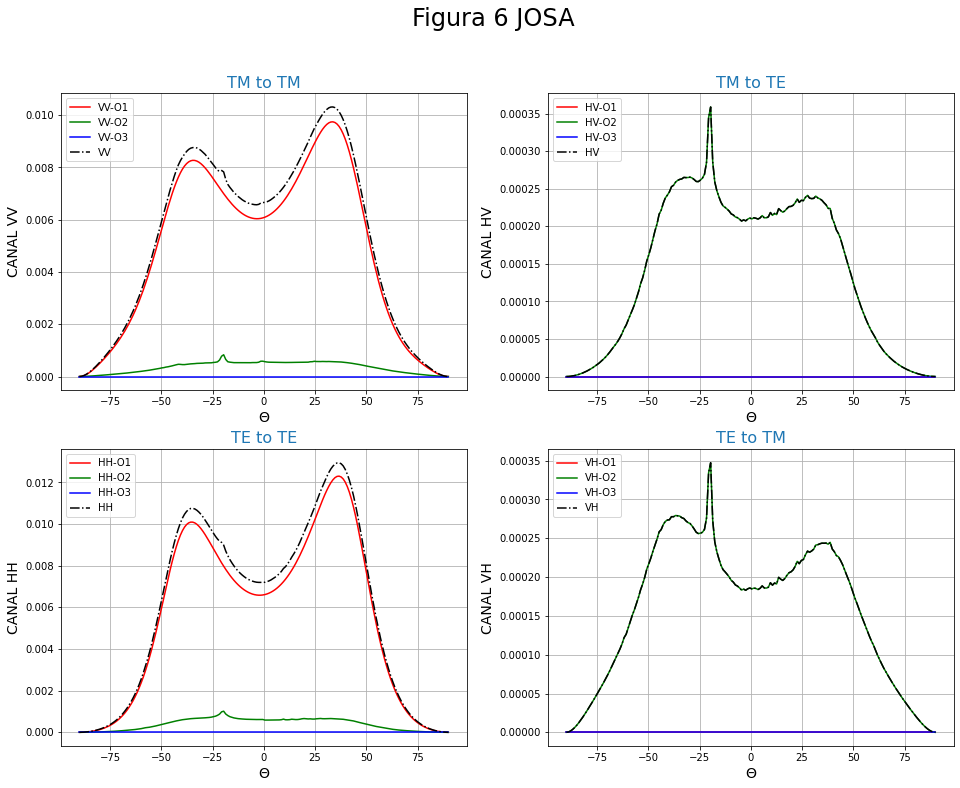

<Figure size 432x288 with 0 Axes>

In [5]:
# VV; HV; HH; VH | O1, O2, O3, O1 + O2 + O3 \ thitas 
#out_ub = np.zeros((4,4,n_ths), dtype = float)


for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(thi)/(2*np.pi)**2
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
#     out_ub[0,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
#                  f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
#     out_ub[1,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
#                  f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
#     out_ub[2,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
#                  f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
#     out_ub[3,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
#                  f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    
    
    # orden dos # I2_QP(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
                # I11_11(rx,ry,ux,uy,qx,qy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)
        
    aux_vv_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
    aux_vv_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
    aux_vv_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[0,0]
    out_ub[0,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_u_O2,(1,m_gauss**2)))))+\
                   np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_b_O2,(1,m_gauss**2)))))+\
                   np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_ub_O2,(1,m_gauss**2)))))
    
    
#     aux_vh_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
#     aux_vh_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,0]
#     aux_vh_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[1,0]
#     out_ub[1,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_b_O2,(1,m_gauss**2)))))+\
#                     np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_ub_O2,(1,m_gauss**2)))))
    
    
#     aux_hh_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
#     aux_hh_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
#     aux_hh_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[1,1]
#     out_ub[2,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_b_O2,(1,m_gauss**2)))))+\
#                     np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_ub_O2,(1,m_gauss**2)))))

    
#     aux_hv_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
#     aux_hv_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,1]
#     aux_hv_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[0,1]
#     out_ub[3,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_b_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_ub_O2,(1,m_gauss**2)))))
    
    
#     # orden tres # I3_QP(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
    
#     aux_vv_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
#     aux_vv_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
#     out_ub[0,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vv_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vv_b_O3,(1,m_gauss**2)))))
    
#     aux_vh_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
#     aux_vh_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,0]
#     out_ub[1,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vh_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vh_b_O3,(1,m_gauss**2)))))
    
#     aux_hh_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
#     aux_hh_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
#     out_ub[2,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hh_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hh_b_O3,(1,m_gauss**2)))))
    
#     aux_hv_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
#     aux_hv_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,1]
#     out_ub[3,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hv_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hv_b_O3,(1,m_gauss**2)))))
    


out_ub[0,3,:] = out_ub[0,0,:] + out_ub[0,1,:] + out_ub[0,2,:]
out_ub[1,3,:] = out_ub[1,0,:] + out_ub[1,1,:] + out_ub[1,2,:]
out_ub[2,3,:] = out_ub[2,0,:] + out_ub[2,1,:] + out_ub[2,2,:]
out_ub[3,3,:] = out_ub[3,0,:] + out_ub[3,1,:] + out_ub[3,2,:]

np.save('fig6_josa.npy',out_ub)




plot_labels = ([['VV-O1', 'VV-O2', 'VV-O3', 'VV'],['HV-O1', 'HV-O2', 'HV-O3', 'HV'], 
                ['HH-O1', 'HH-O2', 'HH-O3', 'HH'],['VH-O1', 'VH-O2', 'VH-O3', 'VH']])

plot_titles = ([['TM to TM', 'TM to TE'], ['TE to TE', 'TE to TM']])

plot_colors = (['r-', 'g-', 'b-', 'k-.'])

yaxis_labels = ([['CANAL VV', 'CANAL HV'], ['CANAL HH', 'CANAL VH']])
# plot_fontweight = (['light','normal', 'bold','heavy'])

fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

i = 0
    
for i1 in range(2):
    for i2 in range(2):

        for i3 in range(4):
            
            ax[i1,i2].plot(180*thetas/np.pi,out_ub[i,i3,:],plot_colors[i3],label = plot_labels[i][i3])
            ax[i1,i2].grid('on')
            ax[i1,i2].legend(loc="upper left",fontsize=10)
            
            ax[i1,i2].set_title(label = plot_titles[i1][i2], color ='C0', fontsize=16,
                                fontstyle='normal')
            
            ax[i1,i2].set_xlabel("$\Theta$", color = 'k', fontsize = 14)
            
            ax[i1,i2].set_ylabel(yaxis_labels[i1][i2], color ='k', fontsize=14, fontstyle='normal')
                        
        i = i +1


fig.suptitle('Figura 6 JOSA', fontsize=24)
plt.show()


plt.savefig( Path_figs + 'Figura_6_JOSA.png', dpi = 400)

In [3]:
r = np.load('fig6_josa.npy')

In [4]:
np.shape(r)

(4, 4, 180)

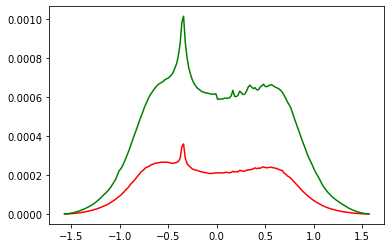

In [24]:
plt.plot(thetas,out_ub[1,1,:],'r')
plt.plot(thetas,out_ub[2,1,:],'g')



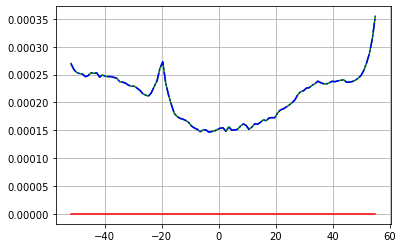

In [15]:
plt.plot(180*thetas[38:145]/np.pi,r[3,0,38:145],'r')
plt.plot(180*thetas[38:145]/np.pi,r[3,1,38:145],'g')
plt.plot(180*thetas[38:145]/np.pi,r[3,0,38:145]+r[3,1,38:145],'b-.')
plt.grid('on')
plt.show()


In [9]:
landa = 0.25
ki = 2*np.pi/l0

thi = 20*np.pi/180
phi = 0

kix = kx(ki,thi,phi)
kiy = ky(ki,thi,phi)

n_ths = 160
thetas = np.linspace(-80*np.pi/180,80*np.pi/180,n_ths)
phs = phi + np.pi


s1 = 0.1*landa
l1 = 1.2*landa

s2 = 0.1*landa
l2 = 1.2*landa

d = 5*landa

ep0 = 1
ep1 = 1.6
ep2 = 50


####### parámetros integración gaussiana ######
n_gauss = 180
k_lim = 5.5*ki

RX = int_gauss(n_gauss,k_lim)['X_IG']
RY = int_gauss(n_gauss,k_lim)['Y_IG']
m_gauss = int_gauss(n_gauss,k_lim)['m_gauss']
Wt = int_gauss(n_gauss,k_lim)['Wt']

# integro del -klim to klim en rx y ry
J = k_lim**2/(2*pi)**2   #Jacobiano/(factor de normalizacion)
###---------------------------------------------------------###

<ipython-input-1-9ed150bce8f4>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(m11,0),(0,m22)])
<ipython-input-1-9ed150bce8f4>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(z11,0),(0,z22)])
<ipython-input-1-50503b471c57>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  m = np.array([(l11,0),(0,l22)]

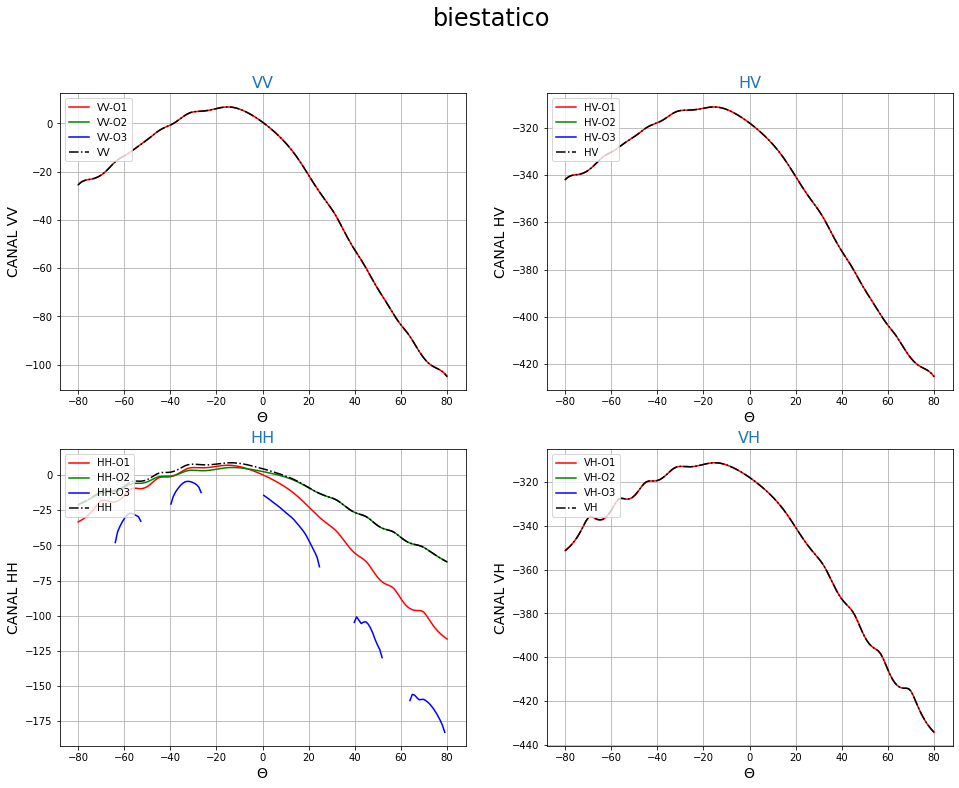

In [12]:
# VV; HV; HH; VH | O1, O2, O3, O1 + O2 + O3 \ thitas 

biest = np.zeros((4,4,n_ths), dtype = float)


for j in range(n_ths):
    
    Q = thetas[j]
    f = ki**4*np.cos(Q)**2*np.cos(thi)/(2*np.pi)**2
    
    ksx = kx(ki,Q,phs)
    ksy = ky(ki,Q,phs)
    
    # orden uno #
    biest[0,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
                 f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    biest[1,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
                 f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    biest[2,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
                 f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    biest[3,0,j] = f*np.abs(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s1,l1)+\
                 f*np.abs(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])**2*W(ksx-kix,ksy-kiy,s2,l2)
    
    
    
    # orden dos # I2_QP(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
                # I11_11(rx,ry,ux,uy,qx,qy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)
        
#     aux_vv_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
#     aux_vv_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
#     aux_vv_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[0,0]
#     biest[0,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_b_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vv_ub_O2,(1,m_gauss**2)))))
    
    
#     aux_vh_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
#     aux_vh_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,0]
#     aux_vh_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[1,0]
#     biest[1,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_b_O2,(1,m_gauss**2)))))+\
#                     np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_vh_ub_O2,(1,m_gauss**2)))))
    
    
    aux_hh_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
    aux_hh_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
    aux_hh_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[1,1]
    biest[2,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_u_O2,(1,m_gauss**2)))))+\
                   np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_b_O2,(1,m_gauss**2)))))+\
                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hh_ub_O2,(1,m_gauss**2)))))

    
#     aux_hv_u_O2 = I2_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
#     aux_hv_b_O2 = I2_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,1]
#     aux_hv_ub_O2 = I11_11(RX,RY,ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d,s1,l1,s2,l2)[0,1]
#     biest[3,1,j] = np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_u_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_b_O2,(1,m_gauss**2)))))+\
#                    np.real(f*J*np.nansum(np.nansum(Wt*np.reshape(aux_hv_ub_O2,(1,m_gauss**2)))))
    
    
    # orden tres # I3_QP(rx,ry,ki,ths,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)
    
#     aux_vv_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,0]
#     aux_vv_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,0]
#     biest[0,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vv_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,0])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vv_b_O3,(1,m_gauss**2)))))
    
#     aux_vh_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,0]
#     aux_vh_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,0]
#     biest[1,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vh_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,0])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_vh_b_O3,(1,m_gauss**2)))))
    
    aux_hh_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[1,1]
    aux_hh_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[1,1]
    biest[2,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
                           np.nansum(np.nansum(Wt*np.reshape(aux_hh_u_O3,(1,m_gauss**2)))))+\
                   2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[1,1])*W(ksx-kix,ksy-kiy,s2,l2)*\
                           np.nansum(np.nansum(Wt*np.reshape(aux_hh_b_O3,(1,m_gauss**2)))))
    
#     aux_hv_u_O3 = I3_QP_u(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s1,l1)[0,1]
#     aux_hv_b_O3 = I3_QP_b(RX,RY,ki,Q,phs,thi,phi,ep0,ep1,ep2,d,s2,l2)[0,1]
#     biest[3,2,j] = 2*np.real(f*J*np.conj(X1_u(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])*W(ksx-kix,ksy-kiy,s1,l1)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hv_u_O3,(1,m_gauss**2)))))+\
#                    2*np.real(f*J*np.conj(X1_b(ksx,ksy,kix,kiy,ki,ep0,ep1,ep2,d)[0,1])*W(ksx-kix,ksy-kiy,s2,l2)*\
#                            np.nansum(np.nansum(Wt*np.reshape(aux_hv_b_O3,(1,m_gauss**2)))))
    



    
##---------------------------------##    
def dB(x):
    
    return 10*np.log10(x)

def deg(x):
    return x*180/np.pi
##---------------------------------##


biest[0,3,:] = biest[0,0,:] + biest[0,1,:] + biest[0,2,:]
biest[1,3,:] = biest[1,0,:] + biest[1,1,:] + biest[1,2,:]
biest[2,3,:] = biest[2,0,:] + biest[2,1,:] + biest[2,2,:]
biest[3,3,:] = biest[3,0,:] + biest[3,1,:] + biest[3,2,:]



plot_labels = ([['VV-O1', 'VV-O2', 'VV-O3', 'VV'],['HV-O1', 'HV-O2', 'HV-O3', 'HV'], 
                ['HH-O1', 'HH-O2', 'HH-O3', 'HH'],['VH-O1', 'VH-O2', 'VH-O3', 'VH']])

plot_titles = ([['VV', 'HV'], ['HH', 'VH']])

plot_colors = (['r-', 'g-', 'b-', 'k-.'])

yaxis_labels = ([['CANAL VV', 'CANAL HV'], ['CANAL HH', 'CANAL VH']])
# plot_fontweight = (['light','normal', 'bold','heavy'])

fig , ax = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

i = 0
    
for i1 in range(2):
    for i2 in range(2):

        for i3 in range(4):
            
            ax[i1,i2].plot(deg(thetas),dB(biest[i,i3,:]),plot_colors[i3],label = plot_labels[i][i3])
            ax[i1,i2].grid('on')
            ax[i1,i2].legend(loc="upper left",fontsize=10)
            
            ax[i1,i2].set_title(label = plot_titles[i1][i2], color ='C0', fontsize=16,
                                fontstyle='normal')
            
            ax[i1,i2].set_xlabel("$\Theta$", color = 'k', fontsize = 14)
            
            ax[i1,i2].set_ylabel(yaxis_labels[i1][i2], color ='k', fontsize=14, fontstyle='normal')
                        
        i = i +1


fig.suptitle('biestatico', fontsize=24)
plt.show()


#plt.savefig( Path_figs + 'Figura_6_JOSA.png', dpi = 400)

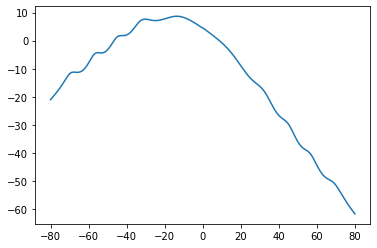

In [14]:
plt.plot(deg(thetas),dB(biest[2,3,:]))